In [0]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import  confusion_matrix

from __future__ import print_function

import keras
from keras import backend as K
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import model_to_dot
from keras.utils.generic_utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from keras.layers import Activation, Add, BatchNormalization, Dropout

SyntaxError: from __future__ imports must occur at the beginning of the file (cell_name, line 10)

In [0]:
model = Sequential()
 
model.add(Conv2D(activation ='relu', input_shape = (32,32,3), filters=32, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
 
model.add(Conv2D(activation ='relu',filters=32, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 
model.add(Conv2D(activation ='relu', filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 
# model.add(Dropout(0.25))
model.add(BatchNormalization())
 
model.add(Conv2D(activation ='relu',filters=128, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 5, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [0]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

In [0]:
train_datagen = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


test_datagen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [0]:
train_generator = train_datagen.flow_from_directory(
                                                    'Dataset/Training_Dataset/',
                                                    target_size=(32, 32),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                    'Dataset/Testing_Dataset/',
                                                    target_size=(32, 32),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 4418 images belonging to 5 classes.
Found 1106 images belonging to 5 classes.


In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)


In [0]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=4418 /30,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1,
                    callbacks=[learning_rate_reduction])

Epoch 1/15
148/147 [==============================] - 21s 145ms/step - loss: 0.3247 - acc: 0.8838 - val_loss: 0.5769 - val_acc: 0.8663
Epoch 2/15
148/147 [==============================] - 21s 139ms/step - loss: 0.1361 - acc: 0.9534 - val_loss: 0.8056 - val_acc: 0.7814
Epoch 3/15
148/147 [==============================] - 21s 141ms/step - loss: 0.1331 - acc: 0.9561 - val_loss: 0.1774 - val_acc: 0.9397
Epoch 4/15
148/147 [==============================] - 21s 140ms/step - loss: 0.1196 - acc: 0.9603 - val_loss: 1.1060 - val_acc: 0.8021
Epoch 5/15
148/147 [==============================] - 21s 141ms/step - loss: 0.1343 - acc: 0.9574 - val_loss: 0.1217 - val_acc: 0.9646
Epoch 6/15
148/147 [==============================] - 21s 143ms/step - loss: 0.0916 - acc: 0.9724 - val_loss: 0.0713 - val_acc: 0.9765
Epoch 7/15
148/147 [==============================] - 21s 141ms/step - loss: 0.0969 - acc: 0.9674 - val_loss: 3.3124 - val_acc: 0.5989
Epoch 8/15
148/147 [==============================] - 2

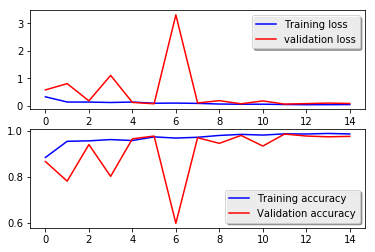

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)